In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [86]:
df = pd.read_excel('shoe.xlsx')

In [87]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [88]:
df.columns

Index(['size(cm)', 'class(y)'], dtype='object')

In [89]:
df.describe()

,size(cm)
count,40.000000
mean,10.067375
std,0.532646
min,9.150000
25%,9.615000
50%,10.137500
75%,10.482500
max,11.050000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   size(cm)  40 non-null     float64
 1   class(y)  40 non-null     object 
dtypes: float64(1), object(1)
memory usage: 772.0+ bytes


In [91]:
df.isnull().sum()

size(cm)    0
class(y)    0
dtype: int64

In [92]:
df.shape

(40, 2)

In [93]:
df.corr(numeric_only = True)

,size(cm)
size(cm),1.0


In [94]:
df.dtypes

size(cm)    float64
class(y)     object
dtype: object

# Label Encoding

In [95]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts

In [96]:
le = LabelEncoder()

In [97]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [98]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [127]:
df['size(cm)'] = le.fit_transform(df['size(cm)'])

In [128]:
df.head()

,size(cm),class(y)
0,7,0
1,19,1
2,26,1
3,13,0
4,38,1


In [130]:
x = df.drop('size(cm)', axis=1)

In [131]:
x.head()

,class(y)
0,0
1,1
2,1
3,0
4,1


In [132]:
x = df.drop('class(y)', axis=1)

In [133]:
y.head()

,size(cm)
0,9.500
1,10.125
2,10.410
3,9.810
4,11.050


In [142]:
xtrain, xtest, ytrain, ytest = tts(df[['size(cm)']], df[['class(y)']], test_size = 0.3, random_state = 39)


In [143]:
xtrain.shape

(28, 1)

In [144]:

xtrain.head()

,size(cm)
19,33
22,1
8,12
7,32
27,36


In [145]:
ytrain.shape

(28, 1)

In [146]:
ytrain.shape

(28, 1)

# Decision Tree

In [275]:
from sklearn.tree import DecisionTreeClassifier

In [276]:
clf = DecisionTreeClassifier()

In [277]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [278]:
pred_clf = clf.predict(xtest)

In [279]:
print(classification_report(ytest, pred_clf))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.71      0.83         7

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12



In [280]:
mse_clf = mean_squared_error(ytest, pred_clf)

In [281]:
mae_clf = mean_absolute_error(ytest, pred_clf)

In [282]:
mse_clf
mae_clf

0.16666666666666666

In [283]:
accuracy_clf = accuracy_score(ytest, pred_clf)
accuracy_clf

0.8333333333333334

# #KNN Classification

In [284]:
from sklearn.neighbors import KNeighborsClassifier

In [285]:
n = KNeighborsClassifier()

In [286]:
n.fit(xtrain, ytrain)

KNeighborsClassifier()

In [287]:
pred_n = n.predict(xtest)
pred_n

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [288]:
print(classification_report(ytest, pred_n))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.86      0.92         7

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12



In [289]:
mse_n = mean_squared_error(ytest, pred_ag)

In [290]:
mae_n = mean_absolute_error(ytest, pred_ag)

In [291]:
mse_n
mae_n

0.08333333333333333

In [292]:
accuracy_n = accuracy_score(ytest, pred_n)
accuracy_n


0.9166666666666666

# Logistic Regression

In [293]:
from sklearn.linear_model import LogisticRegression

In [294]:
log = LogisticRegression()

In [295]:
log.fit(xtrain, ytrain)

LogisticRegression()

In [296]:
pred_log = log.predict(xtest)
pred_log

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [297]:
mae_log = mean_absolute_error(ytest, pred_log)

In [298]:
mse_log = mean_squared_error(ytest, pred_log)

In [299]:
mae_log


0.08333333333333333

In [300]:
mse_log

0.08333333333333333

In [301]:
accuracy_log = accuracy_score(ytest, pred_log)
accuracy_log

0.9166666666666666

# Creating a Data Frame

In [302]:
from pandas.core.dtypes.common import is_numeric_dtype

In [307]:
data = pd.DataFrame({'Model': ['Decision Tree', 'KNN Classification', 'Logistic Regression'], 'Accuracy': [accuracy_clf, accuracy_n,accuracy_log], 'Mean Squared Error': [mse_clf,mse_n,mse_log], 'Mean Absolute Error': [mae_clf, mae_n, mae_log]}, index = [1, 2, 3])
print(data)

                 Model  Accuracy  Mean Squared Error  Mean Absolute Error
1        Decision Tree  0.833333            0.166667             0.166667
2   KNN Classification  0.916667            0.083333             0.083333
3  Logistic Regression  0.916667            0.083333             0.083333


# Barplot

Text(0.5, 1.0, 'Accuracy Measurement')

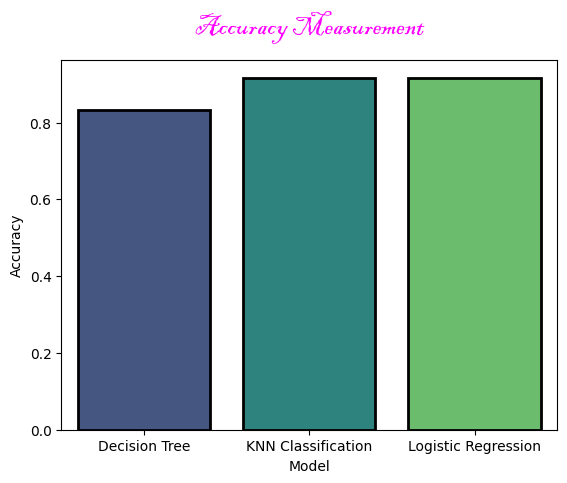

In [330]:
sns.barplot(x = 'Model', y = 'Accuracy', data = data, palette = 'viridis', edgecolor = 'black', linewidth = 2).set_title('Accuracy Measurement', fontsize = 20, pad = 20, fontname = 'Blackadder ITC', fontweight = 'bold', color = 'magenta', loc = 'center')
